In [8]:
import pandas as pd
import numpy as np

array = pd.read_csv('_5shot_3slice_plaquette.csv',index_col=0).to_numpy()
array[np.where(array>0)].mean()

0.41072367820465394

In [1]:
%load_ext autoreload
%autoreload 2

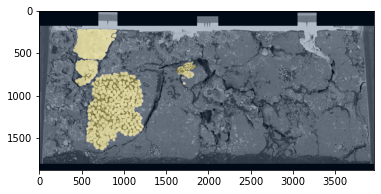

In [124]:
from skimage.transform import resize
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = np.asarray(Image.open('data/NLM9-2/framboid/image/NLM9105.tiff'))
mask = np.asarray(Image.open('data/NLM9-2/framboid/annotation/NLM9105.tiff'))
plt.imshow(img, cmap='gray')
plt.imshow(mask, cmap='cividis',alpha=.3)
# img_resized = resize(img, (384,384))
# Image.fromarray(img_resized).save('test_data/NLM9/plaquette/annotation/1_.tiff')

In [122]:
from sav.datamodule import RandomRotationCrop
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = np.asarray(Image.open('data/NLM9-2/cauliflower/image/NLM9151.tiff'))
mask = np.asarray(Image.open('data/NLM9-2/cauliflower/annotation/NLM9151.tiff'))

T = RandomRotationCrop(img_size=(img.shape[1],img.shape[0]),vflip_p=0, hflip_p=0,rotation_degrees=0, scale=(.25,.25), crop_size=(256,256))
out = T(img,mask)

plt.imshow(out['img'].squeeze(), cmap='gray')
plt.imshow(out['annot'].squeeze(), cmap='cividis',alpha=.3)

FileNotFoundError: [Errno 2] No such file or directory: 'data/NLM9-2/cauliflower/image/NLM9151.tiff'

In [57]:
Image.fromarray(out['img'].squeeze().numpy()).save('test_data/NLM9-2/cauliflower/image/3.tiff')
Image.fromarray(out['annot'].squeeze().numpy()).save('test_data/NLM9-2/cauliflower/annotation/3.tiff')

In [121]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

def covert_annot_to_binary(filepath, save_to):
    if not os.path.isdir(save_to): os.mkdir(save_to)
    img = Image.open(filepath)
    img = np.asarray(img)
    img = np.where(img>0,1,0).astype(np.float64)
    Image.fromarray(img).save(os.path.join(save_to, os.path.split(filepath)[-1].split('.')[-2]+'.tiff'))
    print(f'conversion completed for {filepath}.')
    
def covert_annot_to_binary_list(file_folder, save_to, img_format:str='png'):
    root = os.path.split(file_folder)
    for f in sorted(os.listdir(file_folder)):
        if f.endswith(f'{img_format}'):
            covert_annot_to_binary(os.path.join(file_folder, f), save_to)
                      
covert_annot_to_binary_list('data/NLM9-2/framboid/annotation', 'data/NLM9-2/framboid/annotation', 'png')

conversion completed for data/NLM9-2/framboid/annotation/NLM9105_mask.png.
conversion completed for data/NLM9-2/framboid/annotation/NLM9151_mask.png.


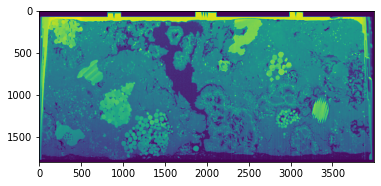

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# img = Image.open('/itf-fi-ml/shared/users/poyenyt/slice-and-view/NLM9/A3D_cauliflower_0001-NLM0200.tiff')
# plt.imshow(np.asarray(img))

In [25]:
from patchify import patchify, unpatchify
import numpy as np
from PIL import Image, ImageOps

def downsample_and_pad(img: "PIL.Image", 
                       patch_size, 
                       down_sampling:int
                      ) -> "PIL.Image":
    resized_img = img.resize((img.size[0]//down_sampling, img.size[1]//down_sampling))
    width, height = resized_img.size
    size_width = patch_size[0]*(width//patch_size[0]+1)
    size_height = patch_size[1]*(height//patch_size[1]+1)
    padded_img = ImageOps.pad(resized_img, size=(size_width, size_height))
    return padded_img

x = Image.fromarray(np.ones((1095,2061)))
y = downsample_and_pad(x, (256,256), 2)
y.size

(1280, 768)

In [225]:
wandb.finish()

epoch,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
metric/mean_iou_cauliflower_FeO,▅▂▅▁▅▆▅▆▄▅▄▆▄▆▅▇▆▆▇▇▆▇▇▆▄▆▇▇█▇▇▇▇▇▇██▇▇█
metric/mean_iou_cauliflower_FeS,▆▁▅▁▆▅▆▅▄▆▆▆▆▇▆▆▇▆▆▆▇▇▇▇▆▇▆▇▇▇▇█▅▆▇█▇▇▆▇
metric/mean_iou_cauliflower_cauliflower,▅▁▅▁▃▄▄▅▅▄▅▅▄▅▆▆▅▆▆▆▆▇▅▇▇▇▇█▆▅▇▇██▇▇▇▅▇▅
metric/mean_iou_cauliflower_magnitite,▆▁▅▁▄▅▄▇▄▅▆▇▇█▄▇▇▆▆█▇█▇▇▇▇▇▇▇▆▆▇██▇▇████
train/iou,▅▅▅▁▃▅▇▅▅█▅▇█▅▇▇▇█▄█▄▆▅▇▆▆▇▇█▇▇▇▆█▇█▇█▇▇
train/loss,▅▅▅█▃▅▂▂▄▄▅▂▃▂▃▃▅▃▂▁▂▁▆▁▂▂▃▂▂▂▁▁▂▂▁▁▂▂▅▂
trainer/global_step,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▄▂▂▅▂▂▆▂▂▂▇▂▂▇▂▂█▂▂▂▂▂
val/epoch_val_iou,▆▁▅▁▄▅▅▆▄▅▆▆▆▆▆▇▇▆▇▇▇███▇▇█▇█▇▇█████████
val/epoch_val_loss,██▆█▆▇▆▅▃▅▃▃▅▃▃▂▂▃▃▃▁▂▂▁▂▂▂▂▂▁▂▁▁▂▁▂▁▁▁▂
val/val_iou_epoch,▆▁▅▁▄▅▅▆▄▅▆▆▆▆▆▇▇▆▇▇▇███▇▇█▇█▇▇█████████


In [167]:
from sav.utils.preprocess import make_binary_mask_dir

make_binary_mask_dir("data/cauliflower/cauliflower_structure/annotation")

data/cauliflower/cauliflower_structure/annotation/channel1_slice_151.tiff
save the binary mask to data/cauliflower/cauliflower_structure/annotation/channel1_slice_151.tiff
data/cauliflower/cauliflower_structure/annotation/channel1_slice_199.tiff
save the binary mask to data/cauliflower/cauliflower_structure/annotation/channel1_slice_199.tiff
data/cauliflower/cauliflower_structure/annotation/channel1_slice_600png.tiff
save the binary mask to data/cauliflower/cauliflower_structure/annotation/channel1_slice_600png.tiff
data/cauliflower/cauliflower_structure/annotation/channel1_slice_100.tiff
save the binary mask to data/cauliflower/cauliflower_structure/annotation/channel1_slice_100.tiff
data/cauliflower/cauliflower_structure/annotation/channel1_slice_800.tiff
save the binary mask to data/cauliflower/cauliflower_structure/annotation/channel1_slice_800.tiff
data/cauliflower/cauliflower_structure/annotation/channel1_slice_1000.tiff
save the binary mask to data/cauliflower/cauliflower_struct

In [18]:
import PIL.Image as Image
path = "data/cauliflower/FeS/annotation/channel1_slice_800.tiff"
Image.open(path)
# ImageOps.flip(Image.open(path)).save(path)

ValueError: Could not save to PNG for display

<PIL.TiffImagePlugin.TiffImageFile image mode=F size=2048x1536>

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np

a = np.array(Image.open("data/apollo_70017/phase_3/image/0424.tiff"))
b = np.array(Image.open("data/apollo_70017/phase_3/annotation/0424.tiff"))

fig, axs = plt.subplots(1,1,figsize=(6,6),dpi=300)
plt.imshow(a, cmap='gray')
plt.imshow(b, cmap='cividis',alpha=0.1)

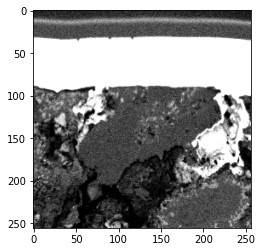

In [74]:
import torch
import torchvision.transforms.v2 as transforms
import PIL.Image as Image
import matplotlib.pyplot as plt

test_img = Image.open('test_data/cauliflower2/channel1_slice_510.tiff')
T = transforms.Compose([transforms.ToTensor(),
                        transforms.ScaleJitter((2048,1536),scale_range=(0.125,1)),
                        transforms.RandomCrop(size=(256,256),pad_if_needed=True),],
                        )
out_img = T(test_img).numpy().squeeze()
plt.imshow(out_img, cmap='gray')

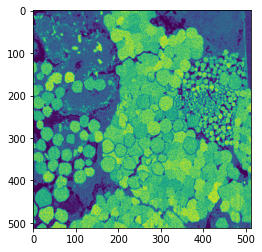

In [52]:
from skimage.filters import gaussian
import numpy as np

back_img = Image.open('test_data/cauliflower_magnetite_sup/image/300_x1500y600.tiff')
back_mask = Image.open('test_data/cauliflower_magnetite_sup/annotation/300_x1500y600.tiff')
test_img = Image.open('test_data/cauliflower_magnetite_sup/image/300_x750y700.tiff')
test_mask = Image.open('test_data/cauliflower_magnetite_sup/annotation/300_x750y700.tiff')
back_img, back_mask, test_img, test_mask = np.array(back_img), np.array(back_mask),np.array(test_img), np.array(test_mask)

def image_copy_paste(img, paste_img, alpha, blend=True, sigma=1):
    if alpha is not None:
        if blend:
            alpha = gaussian(alpha, sigma=sigma, preserve_range=True)

        img_dtype = img.dtype
        # alpha = alpha[..., None]
        img = paste_img * alpha + img * (1 - alpha)
        img = img.astype(img_dtype)
    return img

out_img = image_copy_paste(np.array(back_img), np.array(test_img), np.array(test_mask))
plt.imshow(out_img)

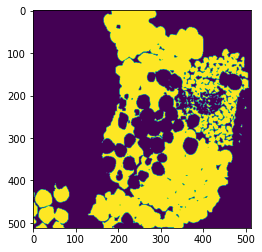

In [62]:
def mask_copy_paste(mask, paste_mask):
    if paste_mask is not None:
        #eliminate pixels that will be pasted over
        mask = np.logical_and(mask, np.logical_xor(mask, paste_mask)).astype(np.uint8)
    return mask

out_mask = mask_copy_paste(back_mask,test_mask)
plt.imshow(out_mask)

In [1]:
import torch
import pytorch_lightning as pl
from pytorch_lightning.callbacks.progress import RichProgressBar
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger
from sav.datamodule import DatamoduleSAV
from sav.module.fs_segmenter import FewShotSegmenter, DeepLabV3
import wandb
wandb.login()

args = dict(# checkpoint
            seed=0, 
            num_epoch=50,
            checkpoint_path='checkpoints/20240612_deeplab',
            model_name='resnet50_framboid',
            version='0',
            precision_for_training=16,
    
            # for model
            backbone='deeplabv3_resnet50', 
            optimizer='adam', 
            learning_rate=1e-4, 
            weight_decay=1e-5,
    
            # for datamodule
            datapath='data',
            nshot=3,
            nsamples=500,
            contrast=(0.5,1.5),
            rotation_degrees=90.0,
            scale=(0.25,1.0),
            crop_size=256,
            val_data_ratio=0.15,
            batch_size=16,
            n_cpu=8,
            )

# Set Logger
logger = WandbLogger(save_dir="lightning_logs",
                     project="slice-and-view_avgpool",)
                     # id='25wrvgh9', resume='must')

# Set checkpoints paths
checkpoint_callback = ModelCheckpoint(
                            save_top_k=20,
                            monitor="val/val_loss", # val/epoch_val_iou
                            # every_n_epochs=5,
                            mode="min",
                            dirpath=args['checkpoint_path'],
                            filename= args['model_name'] + "-{epoch:02d}",
                         )

/itf-fi-ml/home/poyenyt/.local/lib/python3.9/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/itf-fi-ml/home/poyenyt/.local/lib/python3.9/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedba

In [54]:
%load_ext autoreload
%autoreload 2
model = DeepLabV3(backbone='deeplabv3_resnet101')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
model.load_from_checkpoint('_deeplab_resnet101_test/checkpoints/_deeplab_resnet101_test/last.ckpt') 

RuntimeError: Error(s) in loading state_dict for DeepLabV3:
	Unexpected key(s) in state_dict: "model.backbone.layer3.6.conv1.weight", "model.backbone.layer3.6.bn1.weight", "model.backbone.layer3.6.bn1.bias", "model.backbone.layer3.6.bn1.running_mean", "model.backbone.layer3.6.bn1.running_var", "model.backbone.layer3.6.bn1.num_batches_tracked", "model.backbone.layer3.6.conv2.weight", "model.backbone.layer3.6.bn2.weight", "model.backbone.layer3.6.bn2.bias", "model.backbone.layer3.6.bn2.running_mean", "model.backbone.layer3.6.bn2.running_var", "model.backbone.layer3.6.bn2.num_batches_tracked", "model.backbone.layer3.6.conv3.weight", "model.backbone.layer3.6.bn3.weight", "model.backbone.layer3.6.bn3.bias", "model.backbone.layer3.6.bn3.running_mean", "model.backbone.layer3.6.bn3.running_var", "model.backbone.layer3.6.bn3.num_batches_tracked", "model.backbone.layer3.7.conv1.weight", "model.backbone.layer3.7.bn1.weight", "model.backbone.layer3.7.bn1.bias", "model.backbone.layer3.7.bn1.running_mean", "model.backbone.layer3.7.bn1.running_var", "model.backbone.layer3.7.bn1.num_batches_tracked", "model.backbone.layer3.7.conv2.weight", "model.backbone.layer3.7.bn2.weight", "model.backbone.layer3.7.bn2.bias", "model.backbone.layer3.7.bn2.running_mean", "model.backbone.layer3.7.bn2.running_var", "model.backbone.layer3.7.bn2.num_batches_tracked", "model.backbone.layer3.7.conv3.weight", "model.backbone.layer3.7.bn3.weight", "model.backbone.layer3.7.bn3.bias", "model.backbone.layer3.7.bn3.running_mean", "model.backbone.layer3.7.bn3.running_var", "model.backbone.layer3.7.bn3.num_batches_tracked", "model.backbone.layer3.8.conv1.weight", "model.backbone.layer3.8.bn1.weight", "model.backbone.layer3.8.bn1.bias", "model.backbone.layer3.8.bn1.running_mean", "model.backbone.layer3.8.bn1.running_var", "model.backbone.layer3.8.bn1.num_batches_tracked", "model.backbone.layer3.8.conv2.weight", "model.backbone.layer3.8.bn2.weight", "model.backbone.layer3.8.bn2.bias", "model.backbone.layer3.8.bn2.running_mean", "model.backbone.layer3.8.bn2.running_var", "model.backbone.layer3.8.bn2.num_batches_tracked", "model.backbone.layer3.8.conv3.weight", "model.backbone.layer3.8.bn3.weight", "model.backbone.layer3.8.bn3.bias", "model.backbone.layer3.8.bn3.running_mean", "model.backbone.layer3.8.bn3.running_var", "model.backbone.layer3.8.bn3.num_batches_tracked", "model.backbone.layer3.9.conv1.weight", "model.backbone.layer3.9.bn1.weight", "model.backbone.layer3.9.bn1.bias", "model.backbone.layer3.9.bn1.running_mean", "model.backbone.layer3.9.bn1.running_var", "model.backbone.layer3.9.bn1.num_batches_tracked", "model.backbone.layer3.9.conv2.weight", "model.backbone.layer3.9.bn2.weight", "model.backbone.layer3.9.bn2.bias", "model.backbone.layer3.9.bn2.running_mean", "model.backbone.layer3.9.bn2.running_var", "model.backbone.layer3.9.bn2.num_batches_tracked", "model.backbone.layer3.9.conv3.weight", "model.backbone.layer3.9.bn3.weight", "model.backbone.layer3.9.bn3.bias", "model.backbone.layer3.9.bn3.running_mean", "model.backbone.layer3.9.bn3.running_var", "model.backbone.layer3.9.bn3.num_batches_tracked", "model.backbone.layer3.10.conv1.weight", "model.backbone.layer3.10.bn1.weight", "model.backbone.layer3.10.bn1.bias", "model.backbone.layer3.10.bn1.running_mean", "model.backbone.layer3.10.bn1.running_var", "model.backbone.layer3.10.bn1.num_batches_tracked", "model.backbone.layer3.10.conv2.weight", "model.backbone.layer3.10.bn2.weight", "model.backbone.layer3.10.bn2.bias", "model.backbone.layer3.10.bn2.running_mean", "model.backbone.layer3.10.bn2.running_var", "model.backbone.layer3.10.bn2.num_batches_tracked", "model.backbone.layer3.10.conv3.weight", "model.backbone.layer3.10.bn3.weight", "model.backbone.layer3.10.bn3.bias", "model.backbone.layer3.10.bn3.running_mean", "model.backbone.layer3.10.bn3.running_var", "model.backbone.layer3.10.bn3.num_batches_tracked", "model.backbone.layer3.11.conv1.weight", "model.backbone.layer3.11.bn1.weight", "model.backbone.layer3.11.bn1.bias", "model.backbone.layer3.11.bn1.running_mean", "model.backbone.layer3.11.bn1.running_var", "model.backbone.layer3.11.bn1.num_batches_tracked", "model.backbone.layer3.11.conv2.weight", "model.backbone.layer3.11.bn2.weight", "model.backbone.layer3.11.bn2.bias", "model.backbone.layer3.11.bn2.running_mean", "model.backbone.layer3.11.bn2.running_var", "model.backbone.layer3.11.bn2.num_batches_tracked", "model.backbone.layer3.11.conv3.weight", "model.backbone.layer3.11.bn3.weight", "model.backbone.layer3.11.bn3.bias", "model.backbone.layer3.11.bn3.running_mean", "model.backbone.layer3.11.bn3.running_var", "model.backbone.layer3.11.bn3.num_batches_tracked", "model.backbone.layer3.12.conv1.weight", "model.backbone.layer3.12.bn1.weight", "model.backbone.layer3.12.bn1.bias", "model.backbone.layer3.12.bn1.running_mean", "model.backbone.layer3.12.bn1.running_var", "model.backbone.layer3.12.bn1.num_batches_tracked", "model.backbone.layer3.12.conv2.weight", "model.backbone.layer3.12.bn2.weight", "model.backbone.layer3.12.bn2.bias", "model.backbone.layer3.12.bn2.running_mean", "model.backbone.layer3.12.bn2.running_var", "model.backbone.layer3.12.bn2.num_batches_tracked", "model.backbone.layer3.12.conv3.weight", "model.backbone.layer3.12.bn3.weight", "model.backbone.layer3.12.bn3.bias", "model.backbone.layer3.12.bn3.running_mean", "model.backbone.layer3.12.bn3.running_var", "model.backbone.layer3.12.bn3.num_batches_tracked", "model.backbone.layer3.13.conv1.weight", "model.backbone.layer3.13.bn1.weight", "model.backbone.layer3.13.bn1.bias", "model.backbone.layer3.13.bn1.running_mean", "model.backbone.layer3.13.bn1.running_var", "model.backbone.layer3.13.bn1.num_batches_tracked", "model.backbone.layer3.13.conv2.weight", "model.backbone.layer3.13.bn2.weight", "model.backbone.layer3.13.bn2.bias", "model.backbone.layer3.13.bn2.running_mean", "model.backbone.layer3.13.bn2.running_var", "model.backbone.layer3.13.bn2.num_batches_tracked", "model.backbone.layer3.13.conv3.weight", "model.backbone.layer3.13.bn3.weight", "model.backbone.layer3.13.bn3.bias", "model.backbone.layer3.13.bn3.running_mean", "model.backbone.layer3.13.bn3.running_var", "model.backbone.layer3.13.bn3.num_batches_tracked", "model.backbone.layer3.14.conv1.weight", "model.backbone.layer3.14.bn1.weight", "model.backbone.layer3.14.bn1.bias", "model.backbone.layer3.14.bn1.running_mean", "model.backbone.layer3.14.bn1.running_var", "model.backbone.layer3.14.bn1.num_batches_tracked", "model.backbone.layer3.14.conv2.weight", "model.backbone.layer3.14.bn2.weight", "model.backbone.layer3.14.bn2.bias", "model.backbone.layer3.14.bn2.running_mean", "model.backbone.layer3.14.bn2.running_var", "model.backbone.layer3.14.bn2.num_batches_tracked", "model.backbone.layer3.14.conv3.weight", "model.backbone.layer3.14.bn3.weight", "model.backbone.layer3.14.bn3.bias", "model.backbone.layer3.14.bn3.running_mean", "model.backbone.layer3.14.bn3.running_var", "model.backbone.layer3.14.bn3.num_batches_tracked", "model.backbone.layer3.15.conv1.weight", "model.backbone.layer3.15.bn1.weight", "model.backbone.layer3.15.bn1.bias", "model.backbone.layer3.15.bn1.running_mean", "model.backbone.layer3.15.bn1.running_var", "model.backbone.layer3.15.bn1.num_batches_tracked", "model.backbone.layer3.15.conv2.weight", "model.backbone.layer3.15.bn2.weight", "model.backbone.layer3.15.bn2.bias", "model.backbone.layer3.15.bn2.running_mean", "model.backbone.layer3.15.bn2.running_var", "model.backbone.layer3.15.bn2.num_batches_tracked", "model.backbone.layer3.15.conv3.weight", "model.backbone.layer3.15.bn3.weight", "model.backbone.layer3.15.bn3.bias", "model.backbone.layer3.15.bn3.running_mean", "model.backbone.layer3.15.bn3.running_var", "model.backbone.layer3.15.bn3.num_batches_tracked", "model.backbone.layer3.16.conv1.weight", "model.backbone.layer3.16.bn1.weight", "model.backbone.layer3.16.bn1.bias", "model.backbone.layer3.16.bn1.running_mean", "model.backbone.layer3.16.bn1.running_var", "model.backbone.layer3.16.bn1.num_batches_tracked", "model.backbone.layer3.16.conv2.weight", "model.backbone.layer3.16.bn2.weight", "model.backbone.layer3.16.bn2.bias", "model.backbone.layer3.16.bn2.running_mean", "model.backbone.layer3.16.bn2.running_var", "model.backbone.layer3.16.bn2.num_batches_tracked", "model.backbone.layer3.16.conv3.weight", "model.backbone.layer3.16.bn3.weight", "model.backbone.layer3.16.bn3.bias", "model.backbone.layer3.16.bn3.running_mean", "model.backbone.layer3.16.bn3.running_var", "model.backbone.layer3.16.bn3.num_batches_tracked", "model.backbone.layer3.17.conv1.weight", "model.backbone.layer3.17.bn1.weight", "model.backbone.layer3.17.bn1.bias", "model.backbone.layer3.17.bn1.running_mean", "model.backbone.layer3.17.bn1.running_var", "model.backbone.layer3.17.bn1.num_batches_tracked", "model.backbone.layer3.17.conv2.weight", "model.backbone.layer3.17.bn2.weight", "model.backbone.layer3.17.bn2.bias", "model.backbone.layer3.17.bn2.running_mean", "model.backbone.layer3.17.bn2.running_var", "model.backbone.layer3.17.bn2.num_batches_tracked", "model.backbone.layer3.17.conv3.weight", "model.backbone.layer3.17.bn3.weight", "model.backbone.layer3.17.bn3.bias", "model.backbone.layer3.17.bn3.running_mean", "model.backbone.layer3.17.bn3.running_var", "model.backbone.layer3.17.bn3.num_batches_tracked", "model.backbone.layer3.18.conv1.weight", "model.backbone.layer3.18.bn1.weight", "model.backbone.layer3.18.bn1.bias", "model.backbone.layer3.18.bn1.running_mean", "model.backbone.layer3.18.bn1.running_var", "model.backbone.layer3.18.bn1.num_batches_tracked", "model.backbone.layer3.18.conv2.weight", "model.backbone.layer3.18.bn2.weight", "model.backbone.layer3.18.bn2.bias", "model.backbone.layer3.18.bn2.running_mean", "model.backbone.layer3.18.bn2.running_var", "model.backbone.layer3.18.bn2.num_batches_tracked", "model.backbone.layer3.18.conv3.weight", "model.backbone.layer3.18.bn3.weight", "model.backbone.layer3.18.bn3.bias", "model.backbone.layer3.18.bn3.running_mean", "model.backbone.layer3.18.bn3.running_var", "model.backbone.layer3.18.bn3.num_batches_tracked", "model.backbone.layer3.19.conv1.weight", "model.backbone.layer3.19.bn1.weight", "model.backbone.layer3.19.bn1.bias", "model.backbone.layer3.19.bn1.running_mean", "model.backbone.layer3.19.bn1.running_var", "model.backbone.layer3.19.bn1.num_batches_tracked", "model.backbone.layer3.19.conv2.weight", "model.backbone.layer3.19.bn2.weight", "model.backbone.layer3.19.bn2.bias", "model.backbone.layer3.19.bn2.running_mean", "model.backbone.layer3.19.bn2.running_var", "model.backbone.layer3.19.bn2.num_batches_tracked", "model.backbone.layer3.19.conv3.weight", "model.backbone.layer3.19.bn3.weight", "model.backbone.layer3.19.bn3.bias", "model.backbone.layer3.19.bn3.running_mean", "model.backbone.layer3.19.bn3.running_var", "model.backbone.layer3.19.bn3.num_batches_tracked", "model.backbone.layer3.20.conv1.weight", "model.backbone.layer3.20.bn1.weight", "model.backbone.layer3.20.bn1.bias", "model.backbone.layer3.20.bn1.running_mean", "model.backbone.layer3.20.bn1.running_var", "model.backbone.layer3.20.bn1.num_batches_tracked", "model.backbone.layer3.20.conv2.weight", "model.backbone.layer3.20.bn2.weight", "model.backbone.layer3.20.bn2.bias", "model.backbone.layer3.20.bn2.running_mean", "model.backbone.layer3.20.bn2.running_var", "model.backbone.layer3.20.bn2.num_batches_tracked", "model.backbone.layer3.20.conv3.weight", "model.backbone.layer3.20.bn3.weight", "model.backbone.layer3.20.bn3.bias", "model.backbone.layer3.20.bn3.running_mean", "model.backbone.layer3.20.bn3.running_var", "model.backbone.layer3.20.bn3.num_batches_tracked", "model.backbone.layer3.21.conv1.weight", "model.backbone.layer3.21.bn1.weight", "model.backbone.layer3.21.bn1.bias", "model.backbone.layer3.21.bn1.running_mean", "model.backbone.layer3.21.bn1.running_var", "model.backbone.layer3.21.bn1.num_batches_tracked", "model.backbone.layer3.21.conv2.weight", "model.backbone.layer3.21.bn2.weight", "model.backbone.layer3.21.bn2.bias", "model.backbone.layer3.21.bn2.running_mean", "model.backbone.layer3.21.bn2.running_var", "model.backbone.layer3.21.bn2.num_batches_tracked", "model.backbone.layer3.21.conv3.weight", "model.backbone.layer3.21.bn3.weight", "model.backbone.layer3.21.bn3.bias", "model.backbone.layer3.21.bn3.running_mean", "model.backbone.layer3.21.bn3.running_var", "model.backbone.layer3.21.bn3.num_batches_tracked", "model.backbone.layer3.22.conv1.weight", "model.backbone.layer3.22.bn1.weight", "model.backbone.layer3.22.bn1.bias", "model.backbone.layer3.22.bn1.running_mean", "model.backbone.layer3.22.bn1.running_var", "model.backbone.layer3.22.bn1.num_batches_tracked", "model.backbone.layer3.22.conv2.weight", "model.backbone.layer3.22.bn2.weight", "model.backbone.layer3.22.bn2.bias", "model.backbone.layer3.22.bn2.running_mean", "model.backbone.layer3.22.bn2.running_var", "model.backbone.layer3.22.bn2.num_batches_tracked", "model.backbone.layer3.22.conv3.weight", "model.backbone.layer3.22.bn3.weight", "model.backbone.layer3.22.bn3.bias", "model.backbone.layer3.22.bn3.running_mean", "model.backbone.layer3.22.bn3.running_var", "model.backbone.layer3.22.bn3.num_batches_tracked". 

In [3]:
%load_ext autoreload
%autoreload 2
from sav.datamodule import DatamoduleDeepLabV3
datamodule = DatamoduleSAV(datapath=args['datapath'],
                           nsamples=args['nsamples'],
                           contrast=args['contrast'],
                           rotation_degrees=args['rotation_degrees'],
                           scale=args['scale'],
                           crop_size=args['crop_size'],
                           val_data_ratio=args['val_data_ratio'],
                           batch_size=args['batch_size'],
                           n_cpu=args['n_cpu'])
# model = DeepLabV3(backbone=args['backbone'],
#                          optimizer=args['optimizer'],
#                          learning_rate=args['learning_rate'],
#                          weight_decay=args['weight_decay']) 

# trainer = pl.Trainer(max_epochs=args['num_epoch'], 
#                      callbacks=[RichProgressBar(),checkpoint_callback],
#                      logger=logger, 
#                      precision=args['precision_for_training'],
#                      accelerator='gpu', 
#                      devices=1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TypeError: __init__() takes from 2 to 11 positional arguments but 12 were given

In [36]:
trainer.fit(model, datamodule)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [7]


┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type               ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ criterion     │ FocalDiceLoss      │      0 │
│ 1 │ calculate_IoU │ BinaryJaccardIndex │      0 │
│ 2 │ model         │ DeepLabV3          │ 39.6 M │
└───┴───────────────┴────────────────────┴────────┘

Trainable params: 39.6 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 39.6 M                                                                                               
Total estimated model params size (MB): 79

Output()

/itf-fi-ml/home/poyenyt/.local/lib/python3.9/site-packages/pytorch_lightning/utilities/data.py:72: UserWarning: 
Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 16. To avoid any 
miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(

/itf-fi-ml/home/poyenyt/.local/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1938: 
PossibleUserWarning: The number of training samples (27) is smaller than the logging interval 
Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training 
epoch.
  rank_zero_warn(

/itf-fi-ml/home/poyenyt/.local/lib/python3.9/site-packages/pytorch_lightning/utilities/data.py:72: UserWarning: 
Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 11. To avoid any 
miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(

In [ ]:
pl.seed_everything(args['seed'])

datamodule = DatamoduleSAV(datapath=args['datapath'],
                           nshot=args['nshot'],
                           nsamples=args['nsamples'],
                           # img_sizes=args['img_sizes'],
                           contrast=args['contrast'],
                           rotation_degrees=args['rotation_degrees'],
                           scale=args['scale'],
                           crop_size=args['crop_size'],
                           val_data_ratio=args['val_data_ratio'],
                           batch_size=args['batch_size'],
                           n_cpu=args['n_cpu'])

model = FewShotSegmenter(backbone=args['backbone'],
                         optimizer=args['optimizer'],
                         learning_rate=args['learning_rate'],
                         weight_decay=args['weight_decay']
                        ).load_from_checkpoint('_NLM9-2_fram_plaque/checkpoints/_NLM9-2_fram_plaque/149_0.056.ckpt') 
                        # _NLM9_3phases/checkpoints/_NLM9_3phases/121_0.056.ckpt
                        # '_NLM9_2_scale0.2_0.3/checkpoints/_NLM9_2_scale0.2_0.3/last.ckpt'

# _cauliflower_6_slices/checkpoints/_cauliflower_6_slices/last.ckpt
# checkpoints/20230411_256_copy_paste/Avgpool-epoch=194.ckpt
# _cauliflower3_filled_scale_0.25-0.75/checkpoints/_cauliflower3_filled_scale_0.25-0.75/last.ckpt

# cauli_apollo/checkpoints/cauli_apollo/last.ckpt
# checkpoints/20230411_256_copy_paste/Avgpool-epoch=194.ckpt

# trainer = pl.Trainer(max_epochs=args['num_epoch'], 
#                      callbacks=[RichProgressBar(),checkpoint_callback],
#                      logger=logger, 
#                      precision=args['precision_for_training'],
#                      accelerator='gpu', 
#                      devices=1,
#                      resume_from_checkpoint='checkpoints/20230411_256_copy_paste/Avgpool-epoch=121.ckpt')

# trainer.fit(model, datamodule)

In [25]:
from sav.utils.annotator import Annotator
from torchvision import transforms

model.to(device="cuda")
annotator = Annotator(model=model.to(device="cuda"),
                      down_sampling=4,
                      patch_width= 224,
                      patch_height= 224,
                      margin=32,
                      batch_size= 1,
                      keep_dim=True)

# resize=(768,1024),
#                       patch_width=256, 
#                       patch_height=256,
#                       margin=24,
#                       batch_size=3


# out = annotator(query_img_path = "test_data/cauliflower2/channel1_slice_510.tiff",
#                 support_imgs_dir = "test_data/cauliflower_magnetite_sup/image",
#                 support_annots_dir = "test_data/cauliflower_magnetite_sup/annotation" )
out = annotator(query_img_path = '/itf-fi-ml/shared/users/poyenyt/slice-and-view/NLM9_2/NLM9575.tiff',
                support_imgs_dir = "test_data/NLM9-2/cauliflower/image",
                support_annots_dir = "test_data/NLM9-2/cauliflower/annotation",
               )

(-0.5, 3963.5, 1879.5, -0.5)

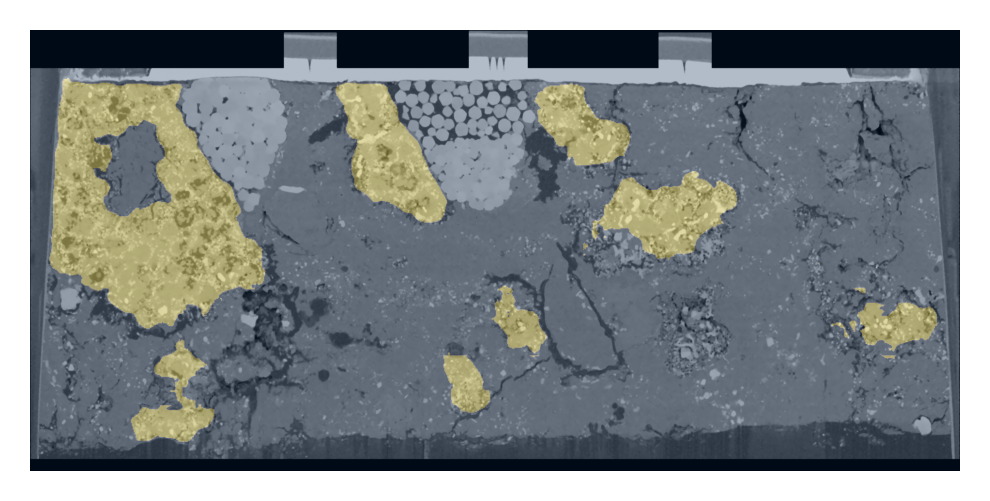

In [26]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1,1,figsize=(4,3),dpi=300)
axs.imshow(out['raw'],cmap='gray')
# axs.imshow(out['annot'], alpha=0.5, cmap='cividis')
axs.imshow(np.where(out['annot']>0.5,1,0), alpha=0.3, cmap='cividis')
axs.axis("off")

(-0.5, 3999.5, 1799.5, -0.5)

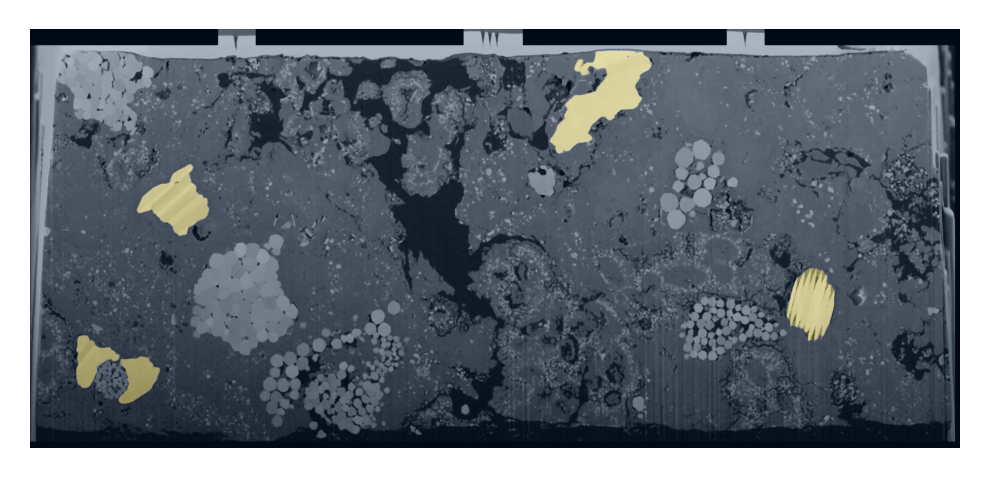

In [51]:
from PIL import Image

img = np.asarray(Image.open('data/NLM9/plaquette/image/A3D_cauliflower_0001-NLM0188.tiff'))
mask = np.asarray(Image.open('data/NLM9/plaquette/annotation/A3D_cauliflower_0001-NLM0188.tiff'))

fig, axs = plt.subplots(1,1,figsize=(4,3),dpi=300)
axs.imshow(img,cmap='gray')
# axs.imshow(out['annot'], alpha=0.5, cmap='cividis')
axs.imshow(mask, alpha=0.3, cmap='cividis')
axs.axis("off")

In [15]:
from sav.utils.visual import eval_model
from sav.datamodule import DatasetSAV

dataset = DatasetSAV(datapath='data', 
                     nshot=3,
                     nsamples=100,
                     rotation_degrees=90,
                     crop_size=768)

eval_model(module=model, 
               dataset=dataset, 
               phase_dir='data/cauliflower/magnitite',
               cmap_annot='cividis',
               cmap_annot_hat='cividis')

AttributeError: 'NoneType' object has no attribute 'keys'

In [45]:
out = annotator(query_img_path = "test_data/cauliflower2",
                support_imgs_dir = "test_data/cauliflower2_sup/image",
                support_annots_dir = "test_data/cauliflower2_sup/annotation",
                save_dir = "test_data/cauliflower2_mask")

Output()

In [8]:
annotator(query_img_path = "test_data/cauliflower2",
          support_imgs_dir = "test_data/cauliflower2_sup/image",
          support_annots_dir = "test_data/cauliflower2_sup/annotation",
          save_dir = "test_data/cauliflower2_mask")

Output()